In [60]:
import requests
import pandas as pd

# NOAA Tidal Station API base URL
base_url = "https://api.tidesandcurrents.noaa.gov/api/prod/datagetter"

# List of tidal station IDs in Maine (including all potentially available stations)
stations = ['8418150', '8413320', '8410140', '8411060', '8419317', 
            '8412160', '8415720', '8416323', '8416745', '8415750']  # Add more station IDs as needed

# Empty list to store data from all stations
all_data = []
available_stations = []  # List to store stations with successful data retrieval

# Loop to request data for each station
for station in stations:
    params = {
        'station': station,  # Station ID for each request
        'product': 'monthly_mean',  # Monthly mean sea level data
        'datum': 'MSL',  # Mean Sea Level
        'units': 'metric',  # Use metric units
        'time_zone': 'gmt',  # Use Greenwich Mean Time
        'application': 'web_services',  # Application name
        'format': 'csv',  # Output format as CSV
        'begin_date': '19500101',  # Start date
        'end_date': '20231231'  # End date
    }

    print(f"Requesting data for station {station} with parameters: {params}")

    # Request data from the API
    response = requests.get(base_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Save the data to a temporary file
        with open(f'noaa_sea_level_data_{station}.csv', 'wb') as f:
            f.write(response.content)

        # Read each station's CSV file
        df = pd.read_csv(f'noaa_sea_level_data_{station}.csv')
        df['station'] = station  # Add station ID as a new column
        all_data.append(df)  # Append the data to the list
        available_stations.append(station)  # Add station to the available list
    else:
        print(f"Failed to retrieve data for station {station}: Status code {response.status_code}")

# Merge data from all available stations if any data was retrieved
if all_data:
    df_combined = pd.concat(all_data, ignore_index=True)
    df_combined.to_csv('noaa_sea_level_data_maine.csv', index=False)  # Save as a combined CSV file
    print("Data successfully retrieved and saved to noaa_sea_level_data_maine.csv")
    print(f"Available stations with data: {available_stations}")
else:
    print("No data retrieved from any station.")



Requesting data for station 8418150 with parameters: {'station': '8418150', 'product': 'monthly_mean', 'datum': 'MSL', 'units': 'metric', 'time_zone': 'gmt', 'application': 'web_services', 'format': 'csv', 'begin_date': '19500101', 'end_date': '20231231'}
Requesting data for station 8413320 with parameters: {'station': '8413320', 'product': 'monthly_mean', 'datum': 'MSL', 'units': 'metric', 'time_zone': 'gmt', 'application': 'web_services', 'format': 'csv', 'begin_date': '19500101', 'end_date': '20231231'}
Requesting data for station 8410140 with parameters: {'station': '8410140', 'product': 'monthly_mean', 'datum': 'MSL', 'units': 'metric', 'time_zone': 'gmt', 'application': 'web_services', 'format': 'csv', 'begin_date': '19500101', 'end_date': '20231231'}
Requesting data for station 8411060 with parameters: {'station': '8411060', 'product': 'monthly_mean', 'datum': 'MSL', 'units': 'metric', 'time_zone': 'gmt', 'application': 'web_services', 'format': 'csv', 'begin_date': '19500101', 

<class 'pandas.core.frame.DataFrame'>
Index: 2892 entries, 0 to 2995
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       2892 non-null   int64         
 1   Month      2892 non-null   int64         
 2   Highest    2797 non-null   float64       
 3   MHHW       1957 non-null   float64       
 4   MHW        2885 non-null   float64       
 5   MSL        2892 non-null   float64       
 6   MTL        2885 non-null   float64       
 7   MLW        2885 non-null   float64       
 8   MLLW       1957 non-null   float64       
 9   DTL        1957 non-null   float64       
 10  GT         1957 non-null   float64       
 11  MN         2885 non-null   float64       
 12  DHQ        1969 non-null   float64       
 13  DLQ        1969 non-null   float64       
 14  HWI        2803 non-null   float64       
 15  LWI        2802 non-null   float64       
 16  Lowest     2796 non-null   float64       
 17  

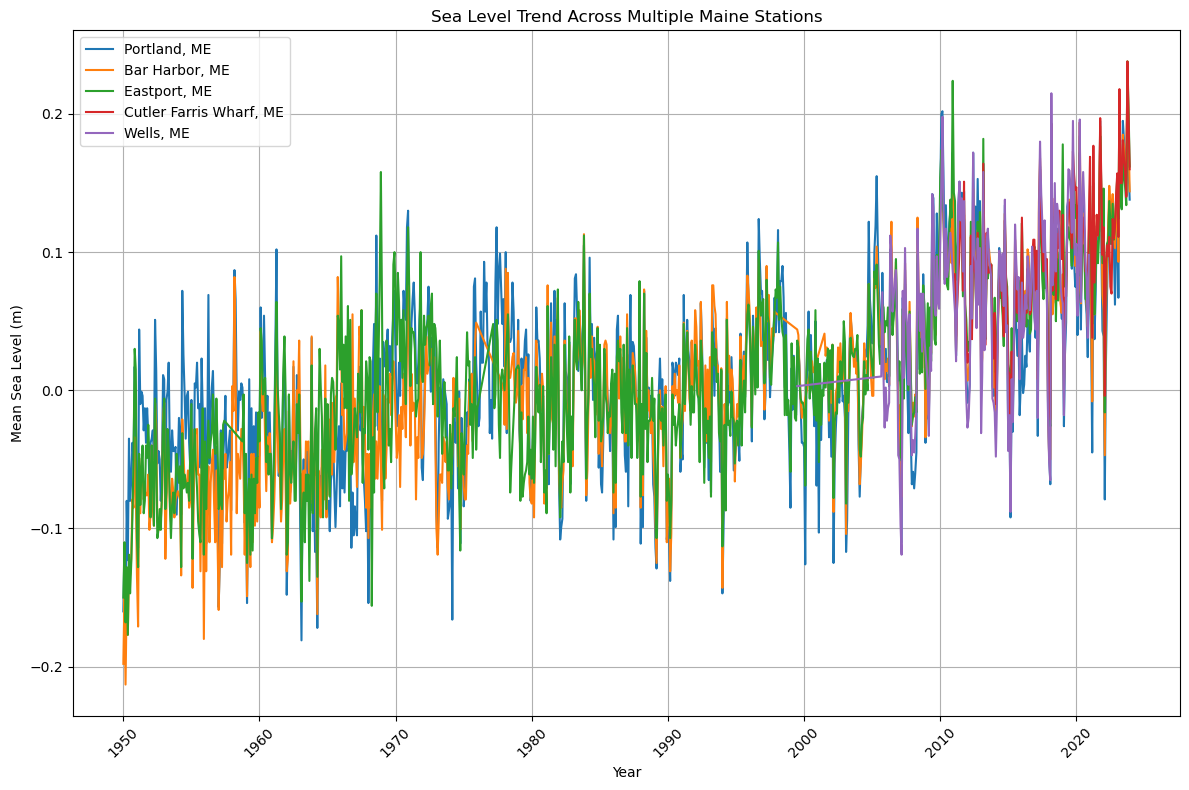

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean column names by removing any leading/trailing whitespaces
df_combined.columns = df_combined.columns.str.strip()

# Combine 'Year' and 'Month' columns into a single time axis 'YearMonth'
df_combined['YearMonth'] = df_combined['Year'].astype(str) + '-' + df_combined['Month'].astype(str)
df_combined['YearMonth'] = pd.to_datetime(df_combined['YearMonth'], format='%Y-%m')

# Check for missing values in the 'MSL' column and handle them (e.g., by dropping rows with missing 'MSL')
df_combined = df_combined.dropna(subset=['MSL'])

df_combined.info()

# Dictionary mapping station IDs (as strings) to their respective locations
station_names = {
    '8418150': 'Portland, ME',
    '8413320': 'Bar Harbor, ME',
    '8410140': 'Eastport, ME',
    '8411060': 'Cutler Farris Wharf, ME',
    '8419317': 'Wells, ME'
}

# Plot the sea level trend for each station
plt.figure(figsize=(12, 8))

# Loop through each unique station and plot its data
for station in df_combined['station'].unique():
    station_data = df_combined[df_combined['station'] == station]
    station_name = station_names.get(station, f'Station {station}')  # Use station name if available
    
    # Plot the sea level data for the station and label it with the station's name
    plt.plot(station_data['YearMonth'], station_data['MSL'], label=station_name)

# Set up the plot with labels, title, and legend
plt.xlabel('Year')  # X-axis label
plt.ylabel('Mean Sea Level (m)')  # Y-axis label
plt.title('Sea Level Trend Across Multiple Maine Stations')  # Plot title
plt.grid(True)  # Enable grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set legend in the upper-left corner with station names
plt.legend(loc='upper left', fontsize=10)

# Adjust layout to ensure the plot fits well and display it
plt.tight_layout()
plt.show()

In [69]:
import requests
import time
import pandas as pd

# NOAA API
BASE_URL = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
TOKEN = "UjvlPxUwLvKKWxVqhmTEBDcInqaxUfve"
headers = {
    'token': TOKEN
}

# Get data for a specific site for a certain year, including a retry mechanism to handle 503 errors
def fetch_data_for_year(station_id, start, end, data_type):
    params = {
        'datasetid': 'GHCND',
        'stationid': station_id,
        'startdate': start,
        'enddate': end,
        'datatypeid': data_type,
        'limit': 1000,
        'units': 'metric'  # Using Metric Units
    }
    
    for attempt in range(5):  # Retry up to 5 times
        response = requests.get(BASE_URL, headers=headers, params=params)
        
        if response.status_code == 200:
            return response.json().get('results', [])
        elif response.status_code == 503:
            print(f"Server busy. Retrying... ({attempt + 1}/5)")
            time.sleep(10)  # Wait 10 seconds and try again
        else:
            print(f"Error fetching data for {data_type} at {station_id}: {response.status_code}")
            break
    
    return []

# Get TMAX and PRCP data for a range of sites and years
def fetch_station_data(station_id, start_year, end_year):
    all_data = []
    
    for year in range(start_year, end_year + 1):
        start = f"{year}-01-01"
        end = f"{year}-12-31"
        
        print(f"Fetching TMAX data for station: {station_id}")
        tmax_data = fetch_data_for_year(station_id, start, end, 'TMAX')
        
        print(f"Fetching PRCP data for station: {station_id}")
        prcp_data = fetch_data_for_year(station_id, start, end, 'PRCP')
        
        if tmax_data:
            all_data.extend(tmax_data)
        
        if prcp_data:
            all_data.extend(prcp_data)
    
    return all_data

# Parse the required information from the results returned by the API
def parse_data(data):
    records = []
    for entry in data:
        records.append({
            'station': entry['station'],
            'date': entry['date'],
            'datatype': entry['datatype'],
            'value': entry['value'],
            'attributes': entry.get('attributes', None)  # Handle missing attributes gracefully
        })
    return records

# Main function, handling all Maine sites
def main():
    # List of all station IDs for Maine (can be extended with other stations if necessary)
    stations = [
        'GHCND:USW00014606', 'GHCND:USW00014614', 'GHCND:USW00014764', 
        'GHCND:USW00014601', 'GHCND:USW00014604', 'GHCND:USW00014605',
        'GHCND:USW00014607', 'GHCND:USW00014609', 'GHCND:USW00014610',
        'GHCND:USW00014611', 'GHCND:USW00014615', 'GHCND:USW00014622',
        'GHCND:USW00014623', 'GHCND:USW00014626', 'GHCND:USW00094623'
        # Add more station IDs as needed
    ]
    
    start_year = 1950
    end_year = 2020
    all_records = []
    
    for station in stations:
        print(f"Fetching data for station: {station}")
        station_data = fetch_station_data(station, start_year, end_year)
        parsed_records = parse_data(station_data)
        all_records.extend(parsed_records)
    
    df_weather = pd.DataFrame(all_records)

    df_weather.to_csv('maine_weather_data.csv', index=False)
    print("Data saved to maine_weather_data.csv")

if __name__ == "__main__":
    main()


Fetching data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetching PRCP data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetching PRCP data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetching PRCP data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetching PRCP data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetching PRCP data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetching PRCP data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetching PRCP data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetching PRCP data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetching PRCP data for station: GHCND:USW00014606
Fetching TMAX data for station: GHCND:USW00014606
Fetch

Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614
Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614
Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614
Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614
Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614
Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614
Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614
Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614
Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614
Fetching PRCP data for station: GHCND:USW00014614
Fetching TMAX data for station: GHCND:USW00014614


Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764
Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764
Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764
Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764
Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764
Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764
Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764
Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764
Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764
Fetching PRCP data for station: GHCND:USW00014764
Fetching TMAX data for station: GHCND:USW00014764


Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601
Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601
Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601
Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601
Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601
Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601
Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601
Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601
Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601
Fetching PRCP data for station: GHCND:USW00014601
Fetching TMAX data for station: GHCND:USW00014601


Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data for station: GHCND:USW00014604
Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data for station: GHCND:USW00014604
Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data for station: GHCND:USW00014604
Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data for station: GHCND:USW00014604
Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data for station: GHCND:USW00014604
Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data for station: GHCND:USW00014604
Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data for station: GHCND:USW00014604
Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data for station: GHCND:USW00014604
Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data for station: GHCND:USW00014604
Server busy. Retrying... (1/5)
Fetching PRCP data for station: GHCND:USW00014604
Fetching TMAX data 

Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605
Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605
Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605
Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605
Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605
Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605
Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605
Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605
Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605
Fetching TMAX data for station: GHCND:USW00014605
Fetching PRCP data for station: GHCND:USW00014605


Fetching TMAX data for station: GHCND:USW00014607
Fetching PRCP data for station: GHCND:USW00014607
Fetching TMAX data for station: GHCND:USW00014607
Fetching PRCP data for station: GHCND:USW00014607
Fetching TMAX data for station: GHCND:USW00014607
Fetching PRCP data for station: GHCND:USW00014607
Fetching TMAX data for station: GHCND:USW00014607
Fetching PRCP data for station: GHCND:USW00014607
Fetching TMAX data for station: GHCND:USW00014607
Fetching PRCP data for station: GHCND:USW00014607
Fetching TMAX data for station: GHCND:USW00014607
Server busy. Retrying... (1/5)
Fetching PRCP data for station: GHCND:USW00014607
Fetching TMAX data for station: GHCND:USW00014607
Fetching PRCP data for station: GHCND:USW00014607
Fetching TMAX data for station: GHCND:USW00014607
Fetching PRCP data for station: GHCND:USW00014607
Fetching TMAX data for station: GHCND:USW00014607
Fetching PRCP data for station: GHCND:USW00014607
Server busy. Retrying... (1/5)
Fetching TMAX data for station: GHCND:

Server busy. Retrying... (1/5)
Fetching TMAX data for station: GHCND:USW00014609
Fetching PRCP data for station: GHCND:USW00014609
Fetching TMAX data for station: GHCND:USW00014609
Fetching PRCP data for station: GHCND:USW00014609
Fetching TMAX data for station: GHCND:USW00014609
Fetching PRCP data for station: GHCND:USW00014609
Fetching TMAX data for station: GHCND:USW00014609
Fetching PRCP data for station: GHCND:USW00014609
Fetching TMAX data for station: GHCND:USW00014609
Fetching PRCP data for station: GHCND:USW00014609
Server busy. Retrying... (1/5)
Fetching TMAX data for station: GHCND:USW00014609
Fetching PRCP data for station: GHCND:USW00014609
Fetching TMAX data for station: GHCND:USW00014609
Fetching PRCP data for station: GHCND:USW00014609
Fetching TMAX data for station: GHCND:USW00014609
Fetching PRCP data for station: GHCND:USW00014609
Fetching data for station: GHCND:USW00014610
Fetching TMAX data for station: GHCND:USW00014610
Fetching PRCP data for station: GHCND:USW00

Fetching PRCP data for station: GHCND:USW00014610
Fetching data for station: GHCND:USW00014611
Fetching TMAX data for station: GHCND:USW00014611
Fetching PRCP data for station: GHCND:USW00014611
Fetching TMAX data for station: GHCND:USW00014611
Fetching PRCP data for station: GHCND:USW00014611
Server busy. Retrying... (1/5)
Fetching TMAX data for station: GHCND:USW00014611
Fetching PRCP data for station: GHCND:USW00014611
Fetching TMAX data for station: GHCND:USW00014611
Fetching PRCP data for station: GHCND:USW00014611
Fetching TMAX data for station: GHCND:USW00014611
Fetching PRCP data for station: GHCND:USW00014611
Fetching TMAX data for station: GHCND:USW00014611
Fetching PRCP data for station: GHCND:USW00014611
Fetching TMAX data for station: GHCND:USW00014611
Fetching PRCP data for station: GHCND:USW00014611
Fetching TMAX data for station: GHCND:USW00014611
Fetching PRCP data for station: GHCND:USW00014611
Fetching TMAX data for station: GHCND:USW00014611
Fetching PRCP data for s

Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615
Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615
Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615
Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615
Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615
Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615
Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615
Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615
Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615
Fetching PRCP data for station: GHCND:USW00014615
Fetching TMAX data for station: GHCND:USW00014615


Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622
Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622
Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622
Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622
Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622
Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622
Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622
Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622
Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622
Fetching PRCP data for station: GHCND:USW00014622
Fetching TMAX data for station: GHCND:USW00014622


Fetching PRCP data for station: GHCND:USW00014623
Fetching TMAX data for station: GHCND:USW00014623
Fetching PRCP data for station: GHCND:USW00014623
Fetching TMAX data for station: GHCND:USW00014623
Fetching PRCP data for station: GHCND:USW00014623
Fetching TMAX data for station: GHCND:USW00014623
Server busy. Retrying... (1/5)
Fetching PRCP data for station: GHCND:USW00014623
Fetching TMAX data for station: GHCND:USW00014623
Fetching PRCP data for station: GHCND:USW00014623
Fetching TMAX data for station: GHCND:USW00014623
Fetching PRCP data for station: GHCND:USW00014623
Fetching TMAX data for station: GHCND:USW00014623
Fetching PRCP data for station: GHCND:USW00014623
Server busy. Retrying... (1/5)
Fetching TMAX data for station: GHCND:USW00014623
Fetching PRCP data for station: GHCND:USW00014623
Fetching TMAX data for station: GHCND:USW00014623
Fetching PRCP data for station: GHCND:USW00014623
Fetching TMAX data for station: GHCND:USW00014623
Fetching PRCP data for station: GHCND:

Fetching PRCP data for station: GHCND:USW00014626
Fetching TMAX data for station: GHCND:USW00014626
Fetching PRCP data for station: GHCND:USW00014626
Fetching TMAX data for station: GHCND:USW00014626
Fetching PRCP data for station: GHCND:USW00014626
Fetching TMAX data for station: GHCND:USW00014626
Fetching PRCP data for station: GHCND:USW00014626
Fetching TMAX data for station: GHCND:USW00014626
Fetching PRCP data for station: GHCND:USW00014626
Server busy. Retrying... (1/5)
Fetching TMAX data for station: GHCND:USW00014626
Fetching PRCP data for station: GHCND:USW00014626
Fetching TMAX data for station: GHCND:USW00014626
Fetching PRCP data for station: GHCND:USW00014626
Server busy. Retrying... (1/5)
Fetching TMAX data for station: GHCND:USW00014626
Server busy. Retrying... (1/5)
Fetching PRCP data for station: GHCND:USW00014626
Fetching TMAX data for station: GHCND:USW00014626
Fetching PRCP data for station: GHCND:USW00014626
Fetching TMAX data for station: GHCND:USW00014626
Fetchin

Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623
Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623
Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623
Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623
Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623
Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623
Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623
Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623
Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623
Fetching PRCP data for station: GHCND:USW00094623
Fetching TMAX data for station: GHCND:USW00094623


In [116]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df_weather = pd.read_csv('maine_weather_data.csv')

# Strip any leading/trailing spaces in column names
df_weather.columns = df_weather.columns.str.strip()

# Convert the 'date' column to a datetime format for easier time-series analysis
df_weather['date'] = pd.to_datetime(df_weather['date'])

In [117]:
# Get a summary of the data structure
print(df_weather.info())

# Show descriptive statistics for numerical columns like 'value'
print(df_weather.describe())

# Show the first few rows of the dataset to understand the structure
print(df_weather.head())

# Count missing values for each column to understand the data completeness
missing_values = df_weather.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Check the distribution of the 'datatype' column (PRCP and TMAX)
print(df_weather['datatype'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394737 entries, 0 to 394736
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   station     394737 non-null  object        
 1   date        394737 non-null  datetime64[ns]
 2   datatype    394737 non-null  object        
 3   value       394737 non-null  float64       
 4   attributes  394737 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 15.1+ MB
None
                                date          value
count                         394737  394737.000000
mean   1983-06-22 10:23:20.667279680       7.338678
min              1950-01-01 00:00:00     -26.700000
25%              1964-02-12 00:00:00       0.000000
50%              1981-08-29 00:00:00       2.200000
75%              2002-12-29 00:00:00      14.400000
max              2020-12-31 00:00:00     812.800000
std                              NaN      10.755926
  

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime format for better handling of time-series data
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Separate the data into TMAX and PRCP for further analysis
df_tmax = df_weather[df_weather['datatype'] == 'TMAX']
df_prcp = df_weather[df_weather['datatype'] == 'PRCP']

In [119]:
# Find the maximum PRCP value
max_prcp_value = df_prcp['value'].max()

# Display the row with the maximum PRCP value
print("Row with the highest PRCP value:")
print(max_prcp_value)

# Remove the row with the maximum PRCP value
df_prcp_cleaned = df_prcp[df_prcp['value'] != max_prcp_value]

Row with the highest PRCP value:
812.8


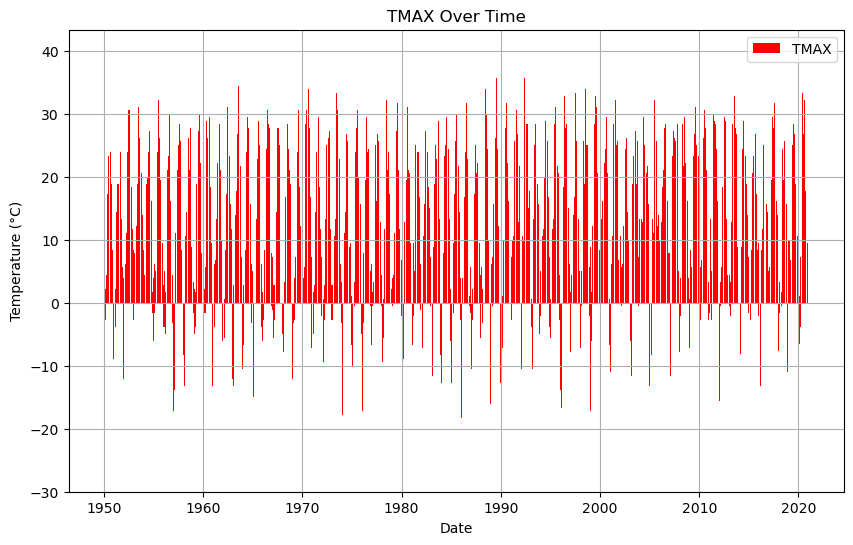

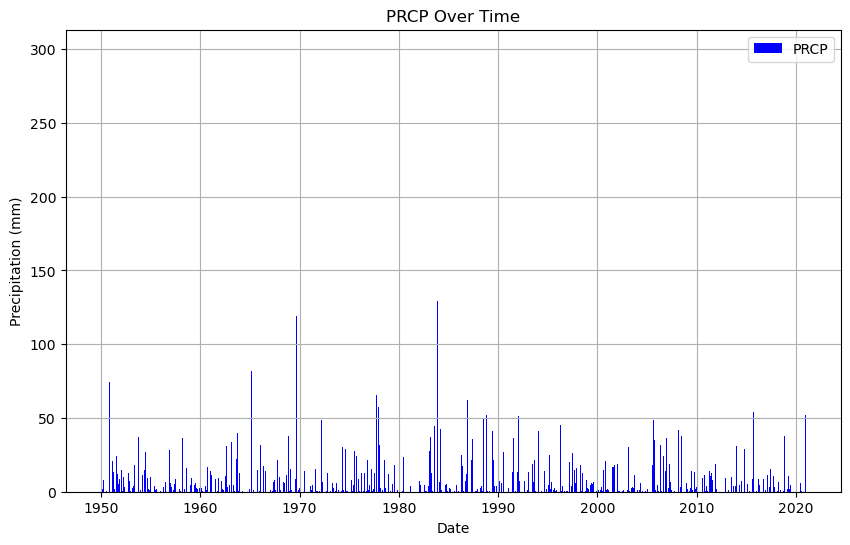

In [120]:
# Plot TMAX as a bar chart over time
plt.figure(figsize=(10, 6))
plt.bar(df_tmax['date'], df_tmax['value'], color='red', label='TMAX')
plt.title('TMAX Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot cleaned PRCP as a bar chart over time
plt.figure(figsize=(10, 6))
plt.bar(df_prcp_cleaned['date'], df_prcp_cleaned['value'], color='blue', label='PRCP')
plt.title('PRCP Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()
